# Chapter 3: Polynomial Regression 📈

## Learning Objectives 🎯
After completing this chapter, you will be able to:
- Understand when linear regression isn't enough
- Work with polynomial regression for non-linear relationships
- Choose the right polynomial degree for your model
- Identify and prevent overfitting in polynomial models

This chapter takes your regression skills to the next level by handling more complex relationships in data!

In [69]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Nothing done.


## 3.1 Introduction & Motivation

### When Linear Isn't Enough! 🚀

Remember how in the previous chapter we used linear regression to draw straight lines through our data? Well, real-world data isn't always that simple!

#### 🤔 Think About It:
- Does temperature always increase linearly throughout the day?
- Do plants grow at exactly the same rate every day?
- Does your learning progress follow a straight line?

The answer is usually "No"! Many real-world relationships are **non-linear**, meaning they can't be accurately represented by a straight line.

#### Enter Polynomial Regression! 🌟
Polynomial regression is like giving our model superpowers:
- Instead of just straight lines, we can create curves
- We can capture more complex patterns in data
- We can make better predictions for non-linear relationships

Think of it as upgrading from a ruler to a flexible curve - now we can fit more interesting shapes!

## 3.2 Problem Setting

### The Limitations of Linear Regression 🤔

Remember linear regression from Chapter 2? While it's powerful, it has one big limitation: it can only model straight-line relationships. But real life is rarely that simple!

#### When Linear Models Fall Short 📊
Think about these scenarios:
1. 🎢 **Roller Coaster Effect**: Some relationships go up and down
2. 🌱 **Growth Patterns**: Many things start slow, speed up, then plateau
3. 🔄 **Cyclical Patterns**: Some things repeat in cycles (like seasons)

#### Question 1: Real-World Non-Linear Examples 🌍
Can you think of relationships that definitely aren't linear? Give 3 examples and explain why.

Some examples to consider:
- 🎾 Height of a thrown ball over time
- 📈 Stock market prices
- 🌡️ Daily temperature changes

Think about what makes these relationships non-linear and why a straight line wouldn't work well to describe them.

In [70]:
x = np.linspace(0, 3, 100) 
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's make a scatterplot to illustrate the non-linearity of this dataset:

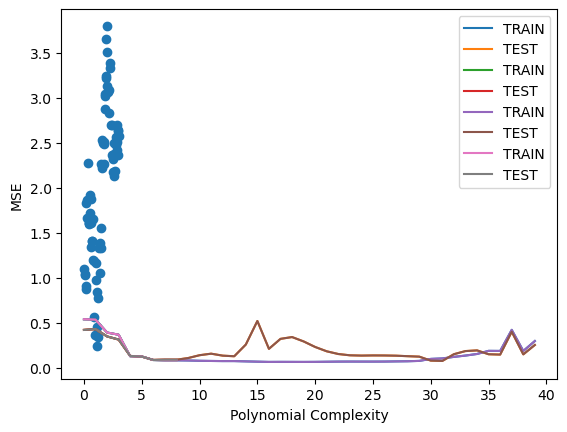

In [71]:
plt.scatter(X_train, y_train)
plt.show()

### 🔍 Understanding Non-Linear Patterns

#### Question 2: Analyzing the Non-Linear Pattern
Look at the scatter plot above. Why isn't this data linear? 

Think about:
- 📈 Does Y consistently increase/decrease as X increases?
- 🔄 Do you see any repeating patterns?
- 📏 Could a straight line capture this pattern well?

#### Question 3: Testing Linear Regression
Let's try fitting a linear regression model to this data. Before we do:
- 🤔 What do you expect will happen?
- 📊 How well do you think it will perform?
- ❌ What limitations might we encounter?

After we fit the model, we'll:
1. Calculate evaluation metrics
2. Visualize the fit
3. Discuss why linear regression isn't suitable here

Remember: Sometimes seeing why something doesn't work helps us understand why we need a better solution!

In [72]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('The R2 score of the model on the train set is:', regressor.score(X_train, y_train))

print('The MAE of the model on the test set is:', mean_absolute_error(regressor.predict(X_test), y_test))
print('The MSE of the model on the test set is:', mean_squared_error(regressor.predict(X_test), y_test))

The R2 score of the model on the train set is: 0.415082394545103
The MAE of the model on the test set is: 0.7203963843057821
The MSE of the model on the test set is: 0.7043403658672862


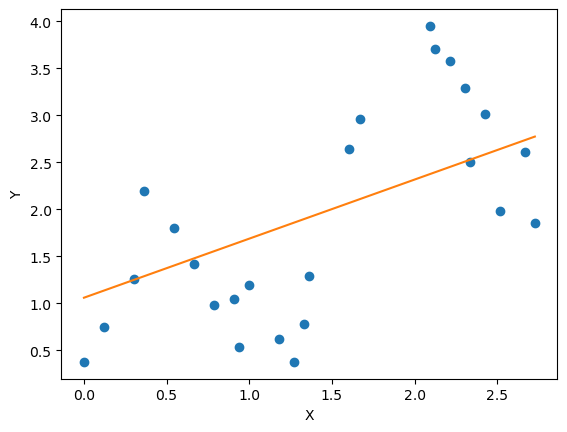

In [73]:
min_pt = X_test.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X_test.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(X_test, y_test, 'o')
plt.plot([X_test.min(), X_test.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3.3 Model

### 3.3.1 Model

### Understanding Polynomial Regression 🎓

#### From Lines to Curves 📈
Based on the error and the context, here's the corrected version for the $SELECTION_PLACEHOLDER$:

While linear regression uses straight lines, polynomial regression can create curves! Here's the magic formula:

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ...$

Don't worry about memorizing this! Here's what you need to know:

#### 🔑 Key Concepts:
1. **Flexibility**: 
   - Linear regression = Only straight lines
   - Polynomial regression = Curves of different shapes

2. **Degree of the Polynomial**:
   - Degree 1 = Straight line (same as linear regression)
   - Degree 2 = Can make one curve (parabola)
   - Degree 3 = Can make two curves
   - And so on...

3. **The Magic Number (Hyperparameter)**:
   - This is the maximum degree we allow
   - Higher number = More flexible curve
   - But careful! Too high can lead to overfitting
   
Remember: More power isn't always better - we need to find the right balance! 🎯

### 3.3.2 Model Estimation

### Let's Build Our First Polynomial Model! 🛠️

Now comes the fun part - we'll create polynomial regression models with different degrees! 

#### 🎯 What We'll Do:
1. Start with degree 0 (super simple!)
2. See what happens
3. Then try different degrees to find the best fit

#### 🤔 Before We Start:
- What do you think degree 0 will look like?
- Will it be better or worse than linear regression?
- What might happen as we increase the degree?

Let's find out! 🚀

In [74]:
model = LinearRegression()
pol_0 = PolynomialFeatures(degree=0)
model.fit(pol_0.fit_transform(X_train), y_train)

LinearRegression()

As you can see in the code, we've started off from a linear regression model and then "added" a polynomial part to it. The interested reader might compare the polynomial function with the linear function and remark why this is.

Let's draw the function we have fitted:

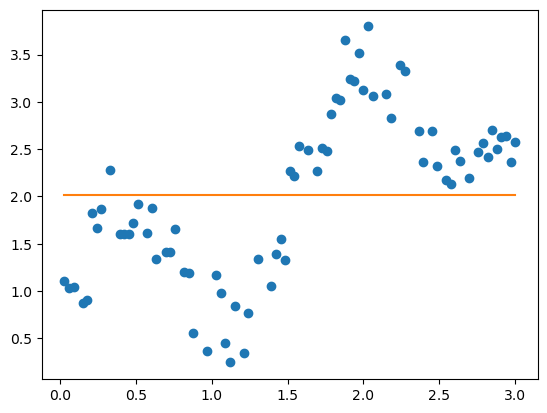

In [75]:
x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
plt.plot(X_train, y_train, 'o')
plt.plot(x, model.predict(pol_0.fit_transform(x))) 
plt.show()

That's odd!! When our hyperparameter is equal to 0, our function is even worse than the linear regression function... 
Let's try and see what's going on, shall we?

##### Question 4: The code below provides a function combining all the steps in making a polynomial regression (creating the model, fitting the model, and plotting the model) while asking an input for the hyperparameter. Try and figure out which hyperparameter gives the best model. Why is this so? 

The R2 score of this model on the train set is: 0.9127806464713225


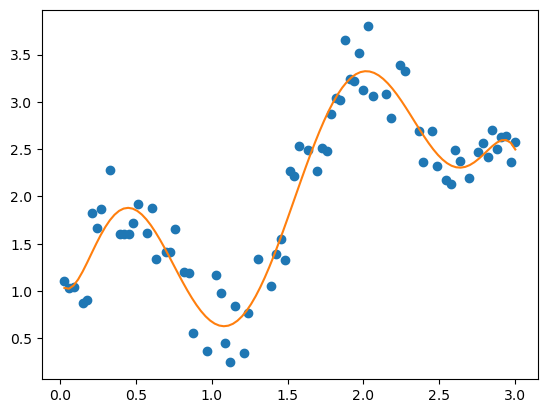

In [76]:
def poly_test(x):
    pol_exp = PolynomialFeatures(degree=x)
    model = LinearRegression()
    model.fit(pol_exp.fit_transform(X_train), y_train)
    print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))
    x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
    plt.plot(X_train, y_train, 'o')
    plt.plot(x, model.predict(pol_exp.fit_transform(x))) 
    plt.show()
    
poly_test(7)    

## 3.4 Model Evaluation

### 📊 Evaluating Our Polynomial Models

Just like with linear regression, we need to check how well our polynomial models perform. But there's a twist - we need to be extra careful about overfitting!

#### Question 5: Comparing Model Performance 🔍

Let's analyze different polynomial degrees using our evaluation metrics:
1. **R² Score**: How well does the model fit the data?
2. **MAE**: Average size of our prediction errors
3. **MSE**: Average squared prediction errors

#### 🎯 What to Look For:
1. **Pattern in Scores**:
   - How do scores change as degree increases?
   - Is there a "sweet spot"?
   - When do scores start getting worse?

2. **Warning Signs**:
   - Very high R² (near 1.0) might mean overfitting
   - Big difference between training and test scores
   - Erratic behavior in higher degrees

3. **Finding Balance**:
   - Too simple = Underfitting
   - Too complex = Overfitting
   - Just right = Good generalization

Let's calculate these metrics and find our best model! 🚀

In [77]:
for x in range(1, 10):
    pol_exp = PolynomialFeatures(degree=x)
    model = LinearRegression()
    model.fit(pol_exp.fit_transform(X_train), y_train)
    print('Evaluations for the model where x equals', x)
    print('\tThe R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_test), y_test))
    print('\tThe MAE score of this model on the test set is:', mean_absolute_error(model.predict(pol_exp.fit_transform(X_test)), y_test))
    print('\tThe MSE score of this model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test))

Evaluations for the model where x equals 1
	The R2 score of this model on the train set is: 0.41067297381418255
	The MAE score of this model on the test set is: 0.7203963843057821
	The MSE score of this model on the test set is: 0.7043403658672862
Evaluations for the model where x equals 2
	The R2 score of this model on the train set is: 0.4106990570496194
	The MAE score of this model on the test set is: 0.7183502207943913
	The MSE score of this model on the test set is: 0.7043091922153506
Evaluations for the model where x equals 3
	The R2 score of this model on the train set is: 0.5280182301969966
	The MAE score of this model on the test set is: 0.6374872097492894
	The MSE score of this model on the test set is: 0.5640939540432992
Evaluations for the model where x equals 4
	The R2 score of this model on the train set is: 0.5735851595235384
	The MAE score of this model on the test set is: 0.6175923410600808
	The MSE score of this model on the test set is: 0.5096341613522617
Evaluations

## 3.5 Exercises

##### Question 1: See section 3.2

##### Question 2: See section 3.2

##### Question 3: See section 3.2

##### Question 4: See section 3.3.2

##### Question 5: See section 3.4

##### Question 6: In section 3.3.2 we created a function where wou could pass the factor of our function as a value called x. Finding the best value for x is an important task to get the best model possible. Taking into account what we learned last week, how would you find the ideal value for x to prevent overfitting?